# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [35]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [36]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [37]:
# Sua análise da parte 1 começa aqui.


In [38]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


In [39]:
normal = dataframe['normal']
binomial = dataframe['binomial']

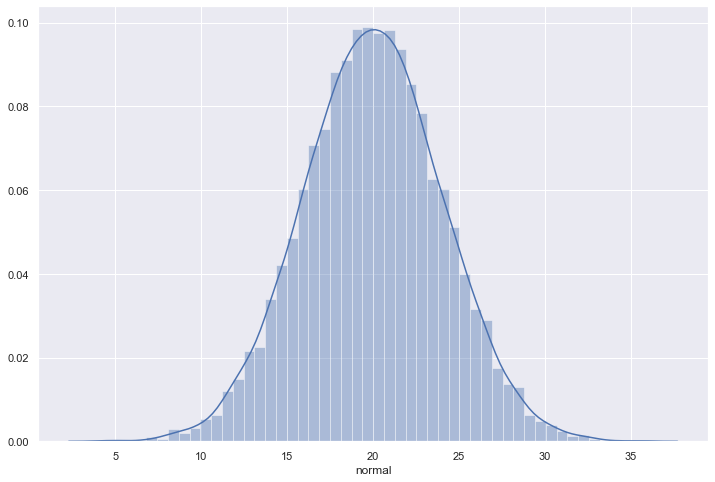

In [40]:
sns.distplot(normal)

In [41]:
print('Distribuição simétrica',sct.skew(normal))
print('Mesócurtica',sct.kurtosis(normal))

Distribuição simétrica 0.0019636977663575524
Mesócurtica 0.026479272360444117


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `biom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

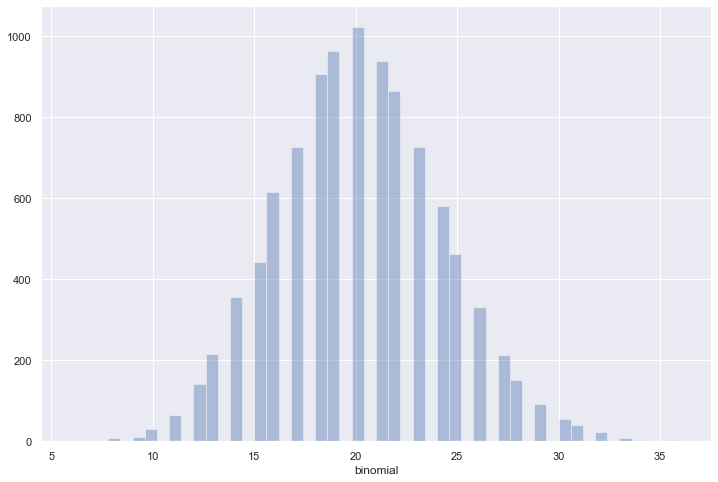

In [42]:
sns.distplot(binomial,kde=False)

In [43]:
print('Distribuição simétrica',sct.skew(binomial))
print('Mesócurtica',sct.kurtosis(binomial))

Distribuição simétrica 0.15333125799740116
Mesócurtica 0.001431956872618212


In [44]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q_norm = [np.quantile(normal,x) for x in [.25,.5,.75]]
    q_binom = [np.quantile(binomial,x) for x in [.25,.5,.75]]
    return tuple(round(x-y,3) for x,y in zip(q_norm,q_binom))
    

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [45]:
def q2():
    # Retorne aqui o resultado da questão 2.
    ecdf = ECDF(normal)
    media = np.mean(normal)
    std = np.std(normal)
    return float(round(ecdf(media+std)-ecdf(media-std),3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [46]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom,v_binom = binomial.mean(),binomial.var()
    m_norm,v_norm = normal.mean(),normal.var()
   
    return (round(m_binom-m_norm,3),round(v_binom-v_norm,3))
    

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [47]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

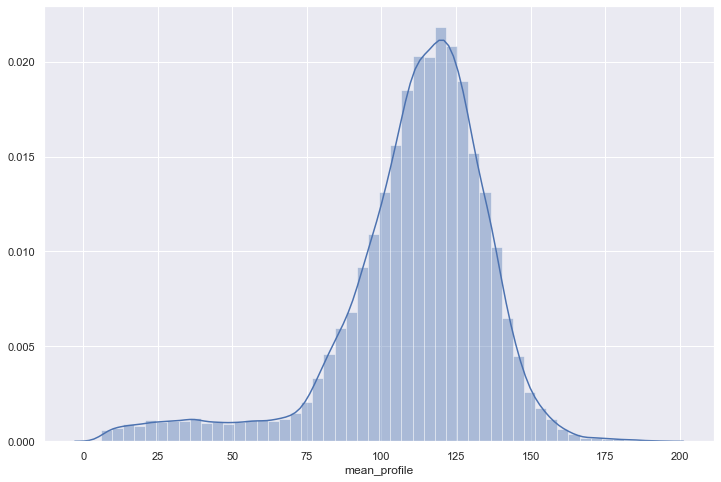

In [48]:
# Sua análise da parte 2 começa aqui.

sns.distplot(stars.mean_profile)

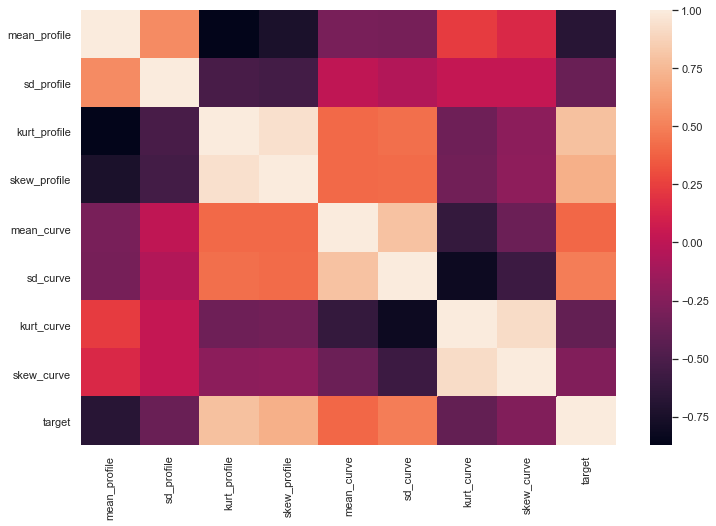

In [49]:
sns.heatmap(stars.corr())

In [50]:
print('Negative Skew',sct.skew(stars.mean_profile))
print('Curtose leptocúrtica',sct.kurtosis(stars.mean_profile))

Negative Skew -1.3750783945665035
Curtose leptocúrtica 2.9713054299352146


In [51]:
filter_stars = stars[stars['target']==0]['mean_profile']
false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)

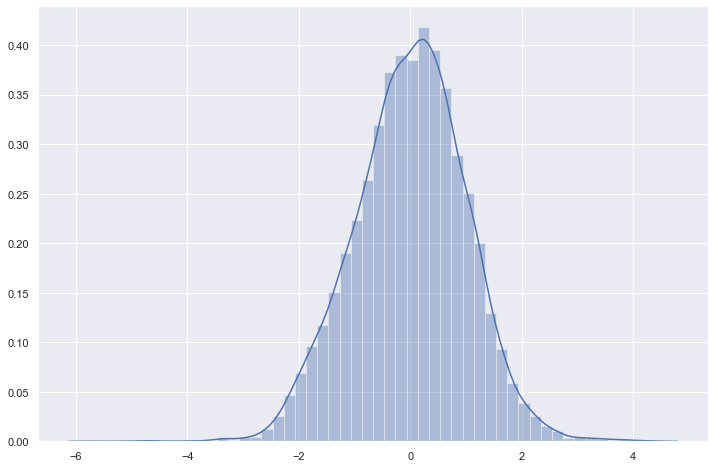

In [52]:
sns.distplot(false_pulsar_mean_profile_standardized)

In [53]:
print('Negative Skew',sct.skew(false_pulsar_mean_profile_standardized))
print('Curtose leptocúrtica',sct.kurtosis(false_pulsar_mean_profile_standardized))

Negative Skew -0.1042973843725326
Curtose leptocúrtica 0.3661499834687727


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [54]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # Sua análise da parte 2 começa aqui.
    filter_stars = stars[stars['target']==0]['mean_profile']
    false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)
    quantis_teoricos = list(map(sct.norm.ppf,[.8,.9,.95]))
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    cdf_empirico =map(ecdf,quantis_teoricos)
    return tuple(round(x,3) for x in cdf_empirico)
    

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [55]:
def q5():
    # Retorne aqui o resultado da questão 5.
    filter_stars = stars[stars['target']==0]['mean_profile']
    false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)
    quantis_teoricos = list(map(sct.norm.ppf,[.25,.5,.75]))
    quantis_empiricos = [np.quantile(false_pulsar_mean_profile_standardized,x) for x in [.25,.5,.75]]
    return tuple(round(x-y,3) for x,y in zip(quantis_empiricos,quantis_teoricos))
    

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.